In [12]:
import numpy as np
import torch
from ipywidgets import interact, interact_manual
import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline
scaling = 2
mpl.rcParams['figure.figsize'] = [6.4*scaling, 4.8*scaling]

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
data = torch.tensor([2.2, 4.412, 123, 2.345, 23.2, 123])
data.reshape((2,3))

tensor([[  2.2000,   4.4120, 123.0000],
        [  2.3450,  23.2000, 123.0000]])

In [4]:
torch.get_default_dtype()

torch.float32

In [5]:
# conda install -c conda-forge nibabel
from pydicom.filereader import dcmread, FileDataset, read_dicomdir
#import pydicom
from glob import glob
import os

"""
# Read a DICOMDIR file

dicomdir = "/media/ivar/HDD3TB2/IN9400_exercises/Ivar_MRI/FLAIR 3D/DICOMDIR"

ds = read_dicomdir(dicomdir)
pixel_data = list()
for record in ds.DirectoryRecordSequence:
    if record.DirectoryRecordType == "IMAGE":
    # Extract the relative path to the DICOM file
        path = dicomdir[:-len("DICOMDIR")] + os.path.join(*record.ReferencedFileID)
        dcm = dcmread(path)

        # Now get your image data
        pixel_data.append(dcm.pixel_array)
pixel_data = np.array(pixel_data)
"""

'\n# Read a DICOMDIR file\n\ndicomdir = "/media/ivar/HDD3TB2/IN9400_exercises/Ivar_MRI/FLAIR 3D/DICOMDIR"\n\nds = read_dicomdir(dicomdir)\npixel_data = list()\nfor record in ds.DirectoryRecordSequence:\n    if record.DirectoryRecordType == "IMAGE":\n    # Extract the relative path to the DICOM file\n        path = dicomdir[:-len("DICOMDIR")] + os.path.join(*record.ReferencedFileID)\n        dcm = dcmread(path)\n\n        # Now get your image data\n        pixel_data.append(dcm.pixel_array)\npixel_data = np.array(pixel_data)\n'

In [6]:
#dcmread(image_slices[int([i for (i, s) in enumerate(image_slices) if "IM" in s][0])]).pixel_array

#series_numbers = np.unique([dcmread(s).SeriesNumber for s in image_slices])

# Read an actual directory of dicom files

aquisition_image_path = "/media/ivar/HDD3TB2/IN9400_exercises/Ivar_MRI/FLAIR 3D/DICOM"
image_slices_unsorted = glob(aquisition_image_path + "/IM*")
def get_image_number(file):
    return int(file[len(file)-list(reversed(file)).index("_"):])
image_slices = sorted(image_slices_unsorted, key=get_image_number)
vol1 = np.array([dcmread(s).pixel_array for s in image_slices if np.str(dcmread(s).SeriesNumber) == "1301"])
#vol2 = np.array([dcmread(s).pixel_array for s in image_slices if np.str(dcmread(s).SeriesNumber) == "1302"])
#vol3 = np.array([dcmread(s).pixel_array for s in image_slices if np.str(dcmread(s).SeriesNumber) == "1303"])

In [7]:
#dcmread( image_slices[ int( [i for (i, s) in enumerate(image_slices) if np.str(dcmread(image_slices[i]).SeriesNumber) == "1301" ][0] ) ] ).walk

<IPython.core.display.Javascript object>


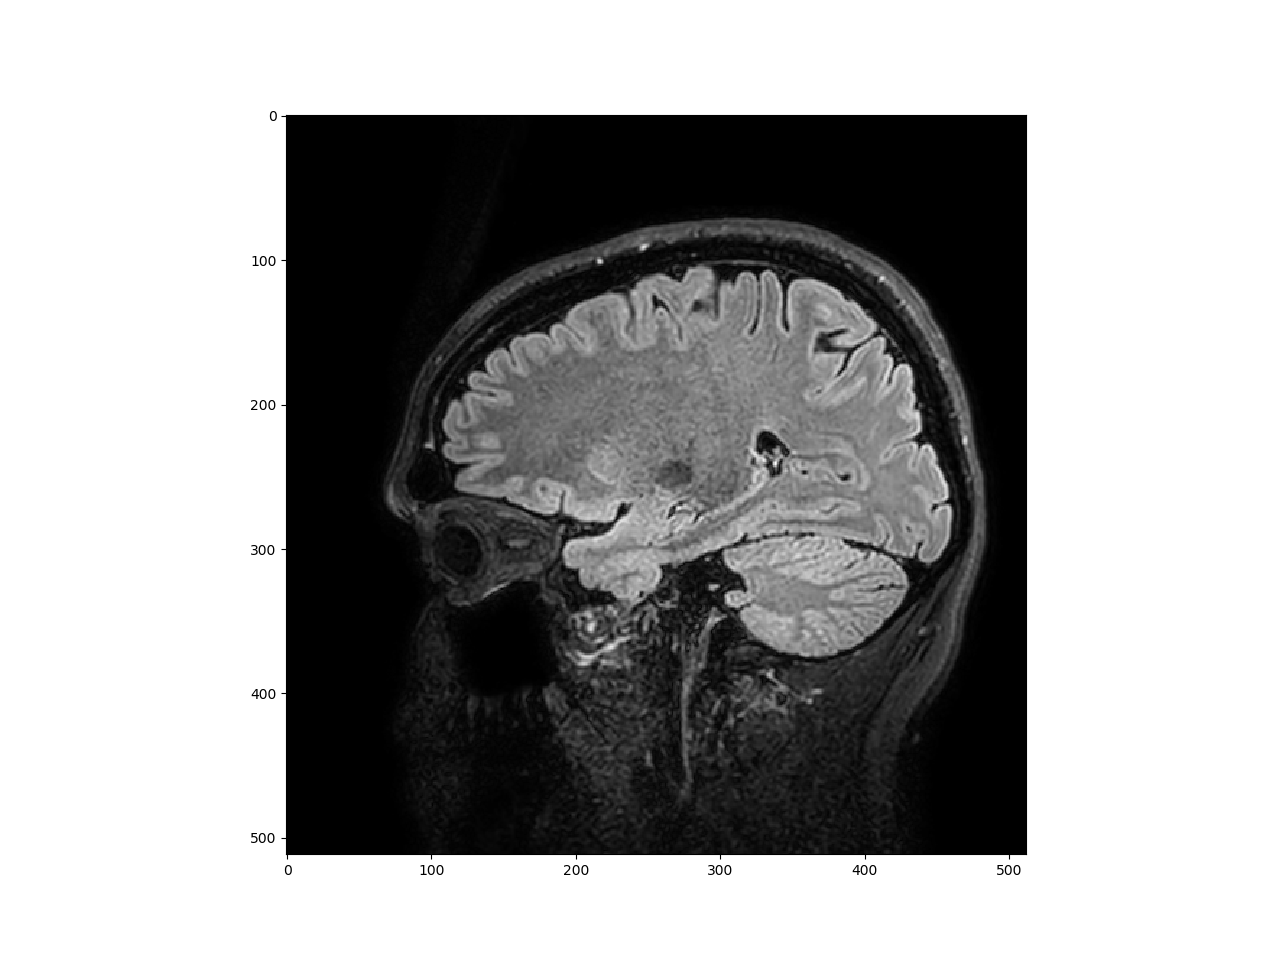

HBox(box_style='info', children=(HTML(value='<em>Slice selection L/R</em>'), IntSlider(value=182, max=365), In…

Output()

In [13]:
plt.figure(1)
def load_and_display_slice(image_slice_nr):
    #image_tensor = \
    #torch.from_numpy(np.float32(dcmread(image_slices[image_slice_nr]).pixel_array))
    s = vol1[image_slice_nr]
    plt.figure(1)
    plt.imshow(s, cmap="gray")

#interact(load_and_display_slice, \
#         image_slice_nr=widgets.IntSlider(min=0,max=len(image_slices),step=1,value=len(image_slices)//2, continuous_update=True))
    
#interact(load_and_display_slice, image_slice_nr=range(len(image_slices)))

x_slider = widgets.IntSlider(min=0,max=len(vol1),step=1,value=len(vol1)//2)

x_box = widgets.IntText()

widgets.jslink((x_slider, 'value'), (x_box, 'value'))

title_widget = widgets.HTML('<em>Slice selection L/R</em>')

play = widgets.Play(
    value=len(vol1)//2,
    min=0,
    max=len(vol1),
    step=1
)

widgets.jslink((play, 'value'), (x_slider, 'value'))

ui = widgets.HBox([title_widget, x_slider, x_box, play])

ui.box_style="info"

out = widgets.interactive_output(load_and_display_slice, {'image_slice_nr': x_slider})

display(ui, out)

In [9]:
%gui qt5
from spimagine import volshow


# render the data and returns the widget 
#w = volshow(np.flip(np.flip(vol1, axis=1), axis=0), stackUnits=(0.48828125, 0.48828125, 0.5), interpolation='nearest')

vol1_zyx = np.swapaxes(vol1, 0, 2)
vol1_zyx = np.swapaxes(vol1_zyx, 0, 1)
vol1_zyx = np.flip(vol1_zyx, 0)
vol1_zyx = np.flip(vol1_zyx, 1)

w = volshow(vol1_zyx, stackUnits=(0.5, 0.48828125, 0.48828125), interpolation='nearest')


w.set_colormap("grays")

In [10]:
vol1_zyx.shape

(512, 512, 365)

In [11]:
volshow?